# Árbol de decisión con regresión
El objetivo es predecir la calidad del vino en función de las características.
Se usará __análisis de regresión__ con el fin de capturar la relación entre las características y el nivel de calidad de los vinos.

author: Virginia Ordoño Bernier

date:January 2024

## Notas
Un árbol de decisión es un método de aprendizaje supervisado que puede utilizarse tanto para tareas de clasificación como para regresión. La idea central detrás de un árbol de decisión es dividir iterativamente el conjunto de datos en subconjuntos más pequeños basándose en las características de los datos, con el objetivo de hacer predicciones o tomar decisiones.

### 1. Carga de datos

In [2]:
import pandas as pd

csv = './data/winequality-red.csv'
data = pd.read_csv(csv)
df_wines = pd.DataFrame(data)
df_wines.columns = [col.lower().replace(' ', '_').rstrip('_') for col in df_wines.columns]
print(df_wines.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### 2. Estudio de la correlación de las variables

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
ph                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


<Axes: >

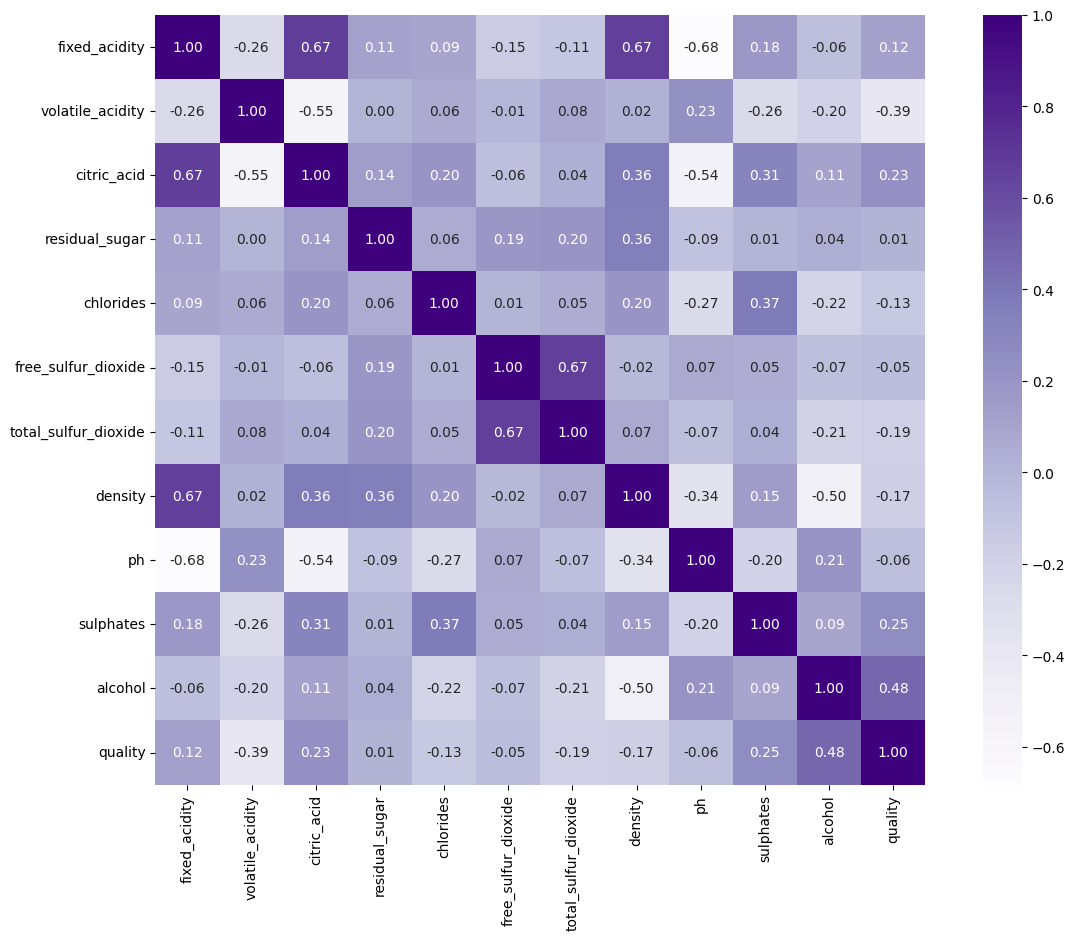

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get correlations
correlation_matrix = df_wines.corr()

# Compare with target and sort them
correlation = correlation_matrix['quality']
sorted_correlations = correlation.sort_values(ascending=False)

print(sorted_correlations)

# Mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(df_wines.corr(), square=True, annot=True, cmap='Purples', fmt=".2f")

### 3. Preparación de los datos para el entrenamiento

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_wines, test_size=0.2, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    493            8.7             0.690         0.31             3.0   
1    354            6.1             0.210         0.40             1.4   
2    342           10.9             0.390         0.47             1.8   
3    834            8.8             0.685         0.26             1.6   
4    705            8.4             1.035         0.15             6.0   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0      0.086                 23.0                  81.0  1.00020  3.48   
1      0.066                 40.5                 165.0  0.99120  3.25   
2      0.118                  6.0                  14.0  0.99820  3.30   
3      0.088                 16.0                  23.0  0.99694  3.32   
4      0.073                 11.0                  54.0  0.99900  3.37   

   sulphates  alcohol  quality  
0       0.74     11.6        6  
1       0.59     

### 4. Creación y entrenamiento del modelo (2 formas)

#### 4.1 Creación y entrenamiento del modelo con las variables con mayor correlación positiva y mayor negativa

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

X_train = train[['alcohol', 'volatile_acidity']]
y_train = train['quality']
X_test = test[['alcohol', 'volatile_acidity']]
y_test = test['quality']

# Selecting regressor. Regressor by default
model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3)

# Training (input data and output data)
model.fit(X_train, y_train)

# Prediction. Redondeamos porque lo estamos abordando como un problema de regresión
y_pred = model.predict(X_test).round().astype(int)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio: {round(mae, 2)}')


Error absoluto medio: 0.51


#### 4.2 Creación y entrenamiento del modelo todas las variables

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

X_train = train.drop('quality', axis=1)
y_train = train['quality']
X_test = test.drop('quality', axis=1)
y_test = test['quality']

# Selecting regressor. Regressor by default
model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3)

# Training (input data and output data)
model.fit(X_train, y_train)

# Prediction 
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio: {round(mae, 2)}')


Error absoluto medio: 0.54


### 5. Validación cruzada con todas las características

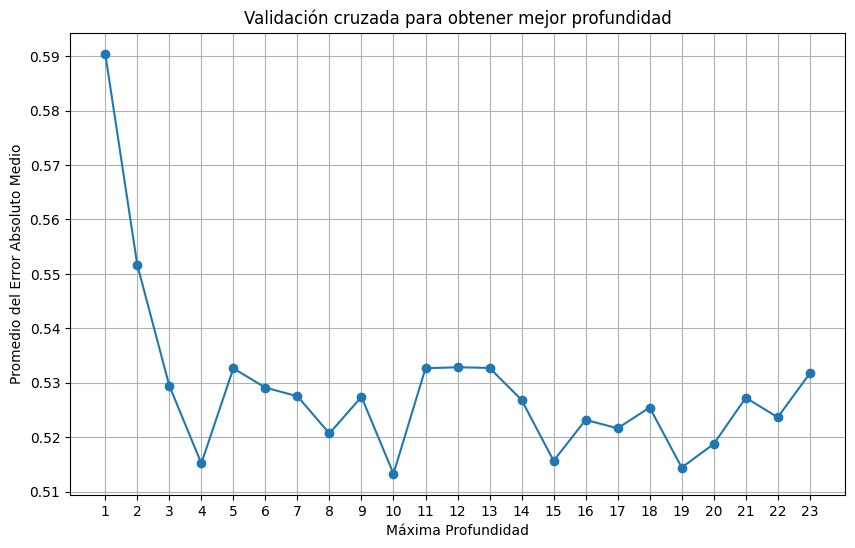

Mejor profundidad: 10
Menor Valor Absoluto Medio: 0.51


In [7]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preparación de los datos
train, test = train_test_split(df_wines, test_size=0.3, random_state=42)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Configuración de la validación cruzada
SPLITS = 3

# Número de atributos en el conjunto de datos 
NUM_ATTRIBUTES = len(list(df_wines))

# Definir el nivel de profundidad del árbol como constante
DEPTH_RANGE = range(1, NUM_ATTRIBUTES * 2) 

# Definir el rango de profundidad
total_scores = []
best_depth = None
min_mae = float('inf')  # Cambiado a infinito para garantizar que se actualice en la primera iteración

cv = KFold(n_splits=SPLITS, shuffle=True, random_state=42)

# Iteración sobre diferentes niveles de profundidad
for depth in DEPTH_RANGE:
    
    fold_accuracy = [] # Almacenar la precisión de cada división/iteración

    model = DecisionTreeRegressor(max_depth=depth)

    for train_fold, test_fold in cv.split(train):
        
        f_train = train.iloc[train_fold]
        f_test = train.iloc[test_fold]

        model.fit(X=f_train.drop(['quality'], axis=1), y=f_train['quality'])
        
        y_pred = model.predict(f_test.drop(['quality'], axis=1))

        # Error medio absoluto de cada iteración
        mae = mean_absolute_error(f_test['quality'], y_pred)
        fold_accuracy.append(mae)

    # Promedio del error absoluto medio
    avg_mae = np.mean(fold_accuracy)
    # Almacenar el promedio del error absoluto medio
    total_scores.append(avg_mae)

    # Actualizar el valor mínimo del error absoluto medio y la mejor profundidad
    if avg_mae < min_mae:
        min_mae = avg_mae
        best_depth = depth

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(DEPTH_RANGE, total_scores, marker='o', linestyle='-')
plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Máxima Profundidad')
plt.ylabel('Promedio del Error Absoluto Medio')
plt.xticks(DEPTH_RANGE)
plt.grid(True)
plt.show()

# Print the results
print(f"Mejor profundidad: {best_depth}")
print(f"Menor Valor Absoluto Medio: {min_mae:.2f}")

### 6. Creación del modelo con los mejores hiperparámetros

Error absoluto medio: 0.51


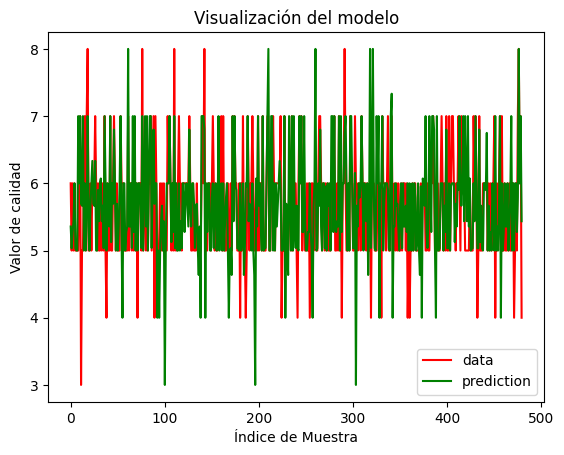

In [8]:
model = DecisionTreeRegressor(max_depth = best_depth)

# Training with all the group
model.fit(
    X = train.drop(['quality'], axis = 1),
    y = train['quality']
)

# Prediction 
y_pred = model.predict( X = test.drop(['quality'], axis = 1))

# Evaluation
mae = mean_absolute_error(test['quality'], y_pred)
print(f'Error absoluto medio: {round(mae, 2)}')

# Visualization
xx = np.arange(test['quality'].shape[0])
plt.plot(xx, test['quality'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title('Visualización del modelo')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor de calidad')
plt.show()


### 7. Visualizacion del árbol de decisión

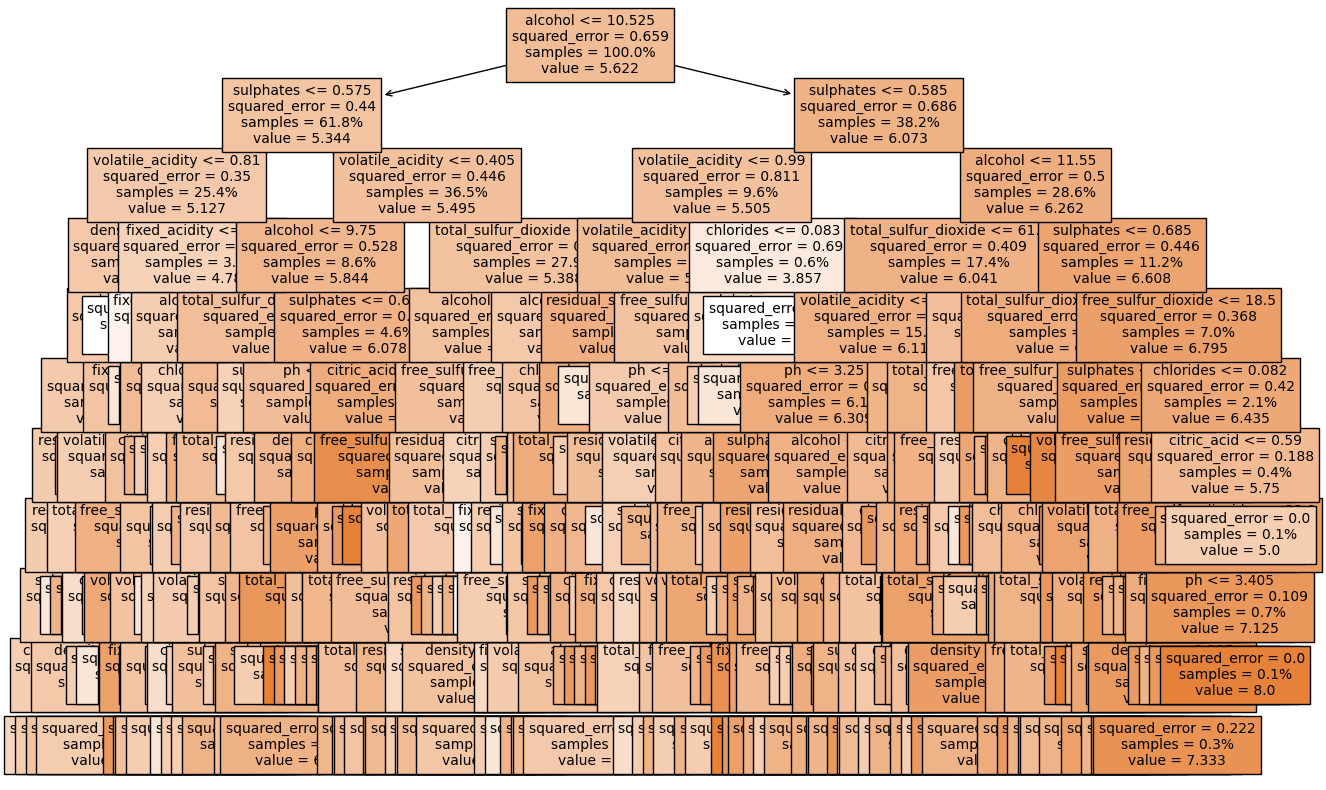

In [9]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

columns_names = list(df_wines.columns.drop('quality'))

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names= columns_names, filled=True, fontsize=10, proportion = True)
plt.show()

### 8. Importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

Informe de Importancia de las Variables:
         Características  Importancia
10               alcohol     0.319883
9              sulphates     0.170432
1       volatile_acidity     0.120944
6   total_sulfur_dioxide     0.067839
5    free_sulfur_dioxide     0.058734
3         residual_sugar     0.058118
8                     ph     0.055231
2            citric_acid     0.044183
4              chlorides     0.041419
7                density     0.032588
0          fixed_acidity     0.030629


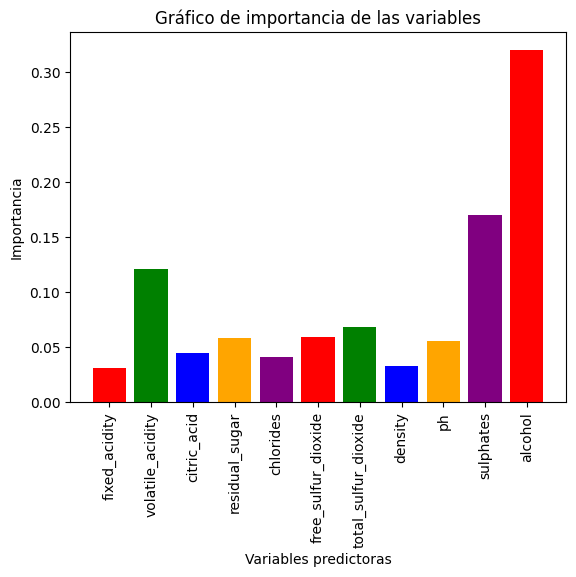

In [10]:
features_names = df_wines.columns.drop('quality')

# Cargamos la importancia de las características
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Características':features_names, 'Importancia': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostramos
print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(features_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()